In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# IMPORT MAD-X survey file

# Check how many skiprows from BASISONE file 
data=pd.read_csv('survey.out',comment='#',sep='\s+',skiprows=6,engine='python')

data_clean=data.shift(periods=1, axis='columns').drop([0]).drop(['*'],axis=1)
data_clean[["S", "L","ANGLE","X","Y","Z","THETA","PHI","PSI"]] = data_clean[["S", "L","ANGLE","X","Y","Z","THETA","PHI","PSI"]].apply(pd.to_numeric)

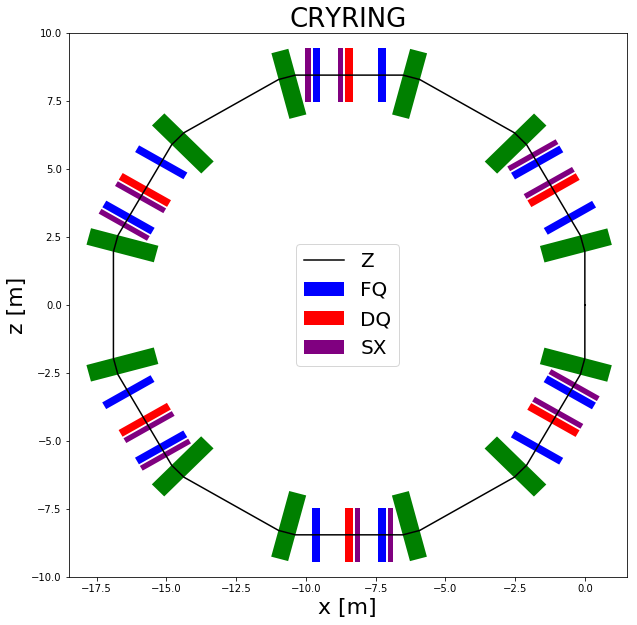

In [25]:
fig,ax=plt.subplots(1,1,figsize=(10,10),facecolor='white')

plt.plot(data_clean['X'],data_clean['Z'],c='black')

edge=0
qfleg=False
qdleg=False
rbendleg=False
sxleg=False

for index,row in data_clean.iterrows():
    
    if row['KEYWORD']=='"QUADRUPOLE"':
        if row['NAME'][2]=='D':
            colo='red'
            lab='DQ'
        if row['NAME'][2]=='F':
            colo='blue'
            lab='FQ'
        
        rectangle1 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=-row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+90), fc=colo,
                                  label=lab if (qdleg==0 or qfleg==0) else "")
        
        rectangle2 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+270), fc=colo)
        
        ax.add_patch(rectangle1)
        ax.add_patch(rectangle2)

        if row['NAME'][2]=='D':
            qdleg=True
        if row['NAME'][2]=='F':
            qfleg=True
        
    if row['KEYWORD']=='"RBEND"':
        rectangle1 = plt.Rectangle(xy=(row['X'], row['Z']), width=-row['L'], height=1.5, 
                                  angle=-rowbef['THETA']*180/np.pi+90+15+edge, fc='green',
                                   label='RBEND' if sbendleg==0 else '')
        
        rectangle2 = plt.Rectangle(xy=(row['X'], row['Z']), width=row['L'], height=1, 
                                  angle=-rowbef['THETA']*180/np.pi+270+15+edge, fc='green')
        
        ax.add_patch(rectangle1)
        ax.add_patch(rectangle2)
        
        sbendleg=True
        
    if row['KEYWORD']=='"SEXTUPOLE"':
        lab='SX'
        colo='purple'
        rectangle1 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=-row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+90), fc=colo,
                                  label=lab if sxleg==0 else "")
        
        rectangle2 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+270), fc=colo)
        
        ax.add_patch(rectangle1)
        ax.add_patch(rectangle2)
        
        sxleg=True

    
    rowbef=row

ax.set_title('CRYRING',fontsize=26)
ax.set_xlabel('x [m]',fontsize=22)
ax.set_ylabel('z [m]',fontsize=22)
ax.set_xlim(-18.5,1.5) 
ax.set_ylim(-10,10) 
ax.legend(fontsize=20)
plt.show()
plt.close()